# ECON 425 Homework 2 - Analysis of weekly stock returns

# Question 3

In [1]:
#Importing essential packages and libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
#Importing data to Pandas DataFrame
stock_data = pd.read_csv("E:/UCLA/Winter 2024/ECON 425/Weekly (1).csv")
stock_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [3]:
#Identifying datatype of the target variable
print(stock_data.dtypes)

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object


In [4]:
#Changing target variable to a binary variable as required for logistic regression
stock_data = pd.get_dummies(stock_data, columns=["Direction"], drop_first= True)
stock_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,False
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,False
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,True
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,True
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,True
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,True
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,True
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,True
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,True


In [5]:
#Defining the variables for the model
direction = stock_data["Direction_Up"]
lag_vars = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]
exog_data = stock_data[["Volume"] + lag_vars]

In [6]:
#Defining and building the logistic regression model
logit_model = LogisticRegression()
logit_results = logit_model.fit(exog_data, direction)
pred_directions = (logit_results.predict(exog_data)).astype(int)
print(pred_directions)

[1 1 1 ... 1 1 1]


              precision    recall  f1-score   support

       False      0.529     0.112     0.184       484
        True      0.564     0.921     0.700       605

    accuracy                          0.561      1089
   macro avg      0.547     0.516     0.442      1089
weighted avg      0.549     0.561     0.471      1089



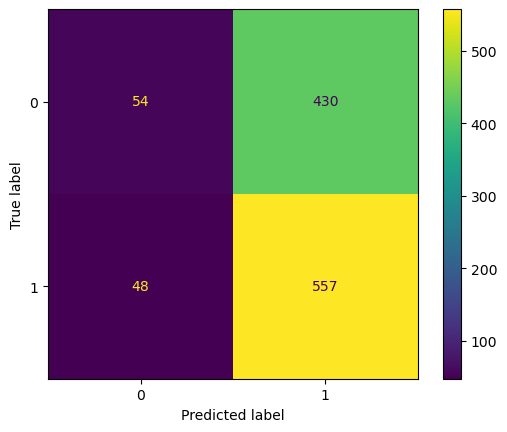

In [7]:
#Constructing a confusion matrix and a classification report to generate metrics on the model
cm = confusion_matrix(direction, pred_directions)
ConfusionMatrixDisplay(cm).plot()
report = classification_report(direction, pred_directions, digits=3)
print(report)

In [8]:
#Extracting the values from the confusion matrix
true_positive = cm[1,1]
true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]

In [9]:
#Estimating the metrics for the model
accuracy = (true_positive + true_negative)/(true_negative+true_positive+false_negative+false_positive)
precision = true_positive/(true_positive+false_positive)
recall = true_positive/(true_positive+false_negative)
f1_score = (2*recall*precision)/(recall+precision)

In [10]:
#Constructing a dataframe to contain the metrics for the model
Indicators = pd.DataFrame({
    "Indicator" : ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Scores" : [accuracy, precision, recall, f1_score]
    })
print(Indicators)

   Indicator    Scores
0   Accuracy  0.561065
1  Precision  0.564336
2     Recall  0.920661
3   F1-Score  0.699749


In [11]:
threshold_range = np.linspace(0,1,num=100)
precision_list = []
recall_list = []
for threshold in threshold_range:
    df = stock_data.copy()
    df["Direction_Up"] = df["Direction_Up"].astype(int)
    df["pred"] = np.where(logit_results.decision_function(exog_data) > threshold, 1, 0)
    TP = np.sum(df[(df["pred"] == 1) & (df["Direction_Up"] == 1)])
    TN = np.sum(df[(df["pred"] == 0) & (df["Direction_Up"] == 0)])
    FP = np.sum(df[(df["pred"] == 1) & (df["Direction_Up"] == 0)])
    FN = np.sum(df[(df["pred"] == 0) & (df["Direction_Up"] == 1)])
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    precision_list.append(precision)
    recall_list.append(recall)
    plot_data = pd.DataFrame({
    "Threshold": threshold_range,
    "Precision": precision_list,
    "Recall": recall_list
    })

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

NameError: name 'Indicators1' is not defined

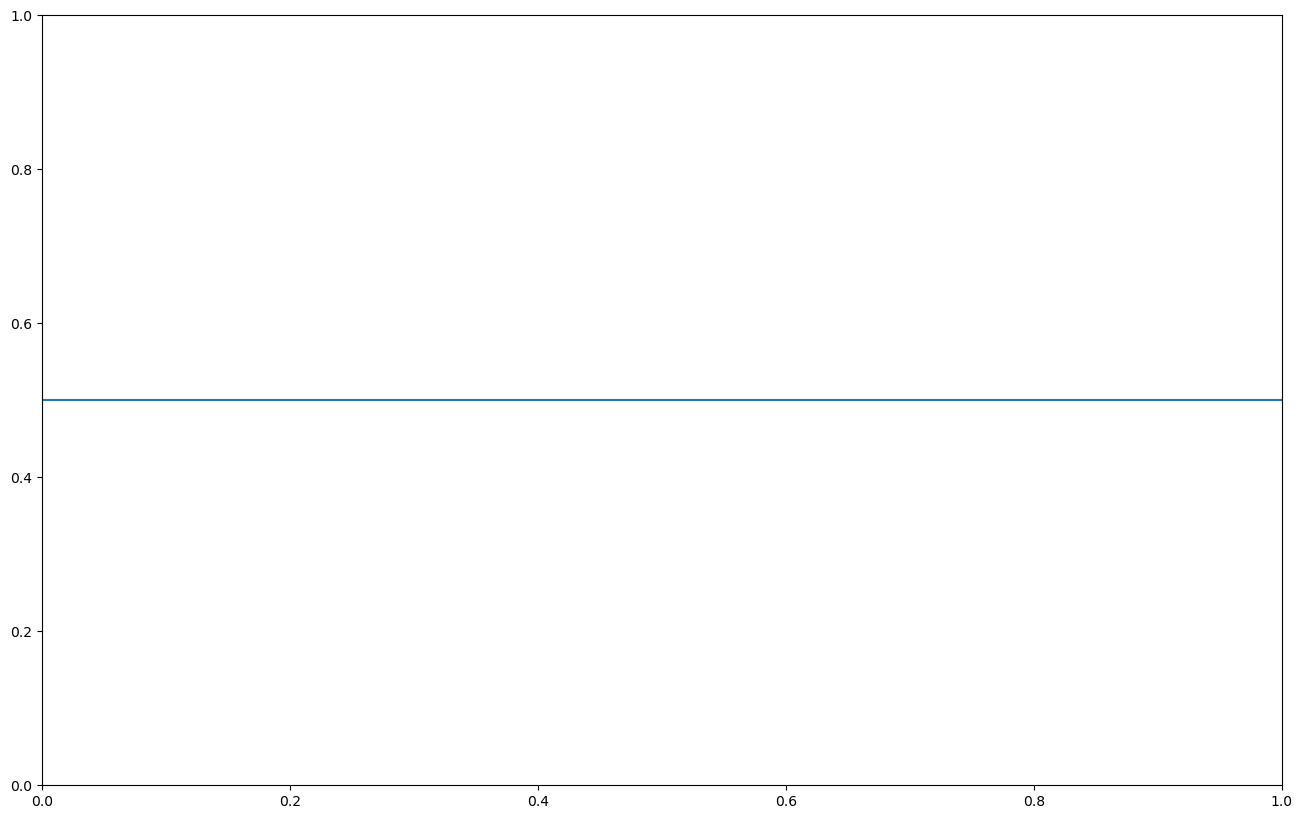

In [12]:
#Plotting precision and recall compared to the 0.5 threshold set for predictions
plt.figure(figsize=(16,10))
plt.axhline(y=0.5, xmax = 1)
plt.plot("Indicator", "Scores", data = Indicators1)
plt.xlabel("Indicators")
plt.ylabel("Scores")
plt.show()

## Building a simple random guessing model that guesses that all observations belong to the "majority" class to compare the performance of our model with it.

In [ ]:
print(stock_data['Direction_Up'].value_counts())

### Here, the majority class is positive, and thus the random classifier will be built such that it predicts "Positive" or 1 for all observations

In [ ]:
random_predictions = np.ones_like(direction)

In [ ]:
cm_random = confusion_matrix(direction, random_predictions)
ConfusionMatrixDisplay(cm_random).plot()
report_random = classification_report(direction, random_predictions, digits=3)
print(report_random)

### In comparison to the logistic regression model, the model with random guessing fares worse on the metric of accuracy. It also fares poorly on precision, recall, and f1-score compared to the logistic regression model. 

The model which classifies all observations to be positive has an accuracy of 0.556, but this is down to the imbalance in the dataset, with significantly more positive observations than negative ones. 

The logistic regression classifier on the other hand, does not suffer from such bias, and has an accuracy of 0.561, it overcomes this deficiency with much superior precision and recall. 

The random model has a precision, recall, and f1-score of 0. In comparison, the logistic classifier has a precision of 0.564, recall of 0.920, and an f1-score of 0.699. 

In [13]:
#Splitting the data into test and train sets with data upto 2008 being used to train the model
stock_data1 = stock_data.copy()
stock_data1 = stock_data1.set_index("Year")
stock_train = stock_data1.loc[:2008]
stock_test = stock_data1.loc[2009:]

In [14]:
#Defining the variables for the new model
direction1 = stock_train["Direction_Up"]
direction2 = stock_test["Direction_Up"]
x = np.array(stock_train["Lag2"])
x = x.reshape(-1,1)
x1 = np.array(stock_test["Lag2"])
x1 = x1.reshape(-1,1)

In [15]:
#Defining and building the logistic regression model
logit_model3 = LogisticRegression()
logit_results3 = logit_model3.fit(x, direction1)
pred_directions3 = (logit_results3.predict(x1)).astype(int)

              precision    recall  f1-score   support

       False      0.643     0.209     0.316        43
        True      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



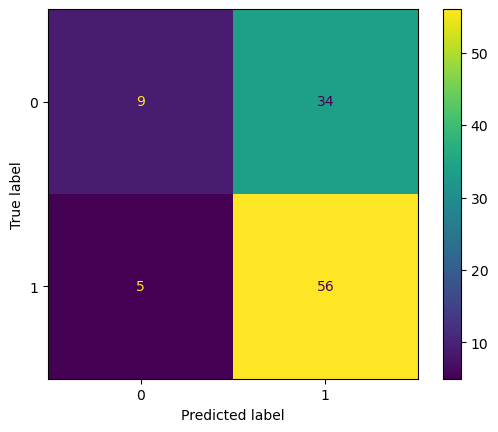

In [16]:
#Constructing a confusion matrix and a classification report to generate metrics on the model
cm3 = confusion_matrix(direction2, pred_directions3)
ConfusionMatrixDisplay(cm3).plot()
report3 = classification_report(direction2, pred_directions3, digits=3)
print(report3)

In [17]:
#Extracting the values from the confusion matrix
true_positive3 = cm3[1,1]
true_negative3 = cm3[0,0]
false_positive3 = cm3[0,1]
false_negative3 = cm3[1,0]

In [18]:
#Estimating the metrics for the model
accuracy3 = (true_positive3 + true_negative3)/(true_negative3+true_positive3+false_negative3+false_positive3)
precision3 = true_positive3/(true_positive3+false_positive3)
recall3 = true_positive3/(true_positive3+false_negative3)
f1_score3 = (2*recall3*precision3)/(recall3+precision3)

In [19]:
#Constructing a dataframe to contain the metrics for the model
Indicators3 = pd.DataFrame({
    "Indicator" : ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Scores" : [accuracy3, precision3, recall3, f1_score3]
    })
print(Indicators3)

   Indicator    Scores
0   Accuracy  0.625000
1  Precision  0.622222
2     Recall  0.918033
3   F1-Score  0.741722


## On the basis of both these model's metrics, I would clearly prefer the second model. It scores far better on all the metrics we calculated, with notably superior accuracy and F1-score. 